In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_excel('hasil_pivot2020.xlsx')

In [4]:
df

,nama_kecamatan,cabul,curanmor,curas,curat,kdrt,pemalsuan,pencurian,pencurian_penggelapan,penganiayaan,pengeroyokan,pengrusakan,penggelapan,penipuan,penipuan_penggelapan,perampasan,perundungan_anak,total
0,BANYUSARI,1,2,0,2,0,0,1,0,0,0,0,0,2,0,0,0,8
1,BATUJAYA,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,6
2,CIAMPEL,0,1,0,6,2,1,6,1,4,1,1,3,8,1,0,0,35
3,CIBUAYA,2,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,6
4,CIKAMPEK,1,1,0,5,0,0,3,0,10,12,1,6,17,1,0,0,57
5,CILAMAYA KULON,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0,1,6
6,CILAMAYA WETAN,1,2,0,2,0,0,1,0,1,2,0,2,0,0,0,0,11
7,CILEBAR,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2
8,JATISARI,0,3,3,2,1,0,0,0,0,4,0,0,1,0,0,1,15
9,JAYAKERTA,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,4


In [5]:
# df = df[['nama_kecamatan', 'total_banjir', 'total_gempa', 'total_longsor']]
dataset_nokec = df.drop(['nama_kecamatan', 'total'], axis=1)
dataset_nokec

,cabul,curanmor,curas,curat,kdrt,pemalsuan,pencurian,pencurian_penggelapan,penganiayaan,pengeroyokan,pengrusakan,penggelapan,penipuan,penipuan_penggelapan,perampasan,perundungan_anak
0,1,2,0,2,0,0,1,0,0,0,0,0,2,0,0,0
1,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,6,2,1,6,1,4,1,1,3,8,1,0,0
3,2,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0
4,1,1,0,5,0,0,3,0,10,12,1,6,17,1,0,0
5,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0,1
6,1,2,0,2,0,0,1,0,1,2,0,2,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8,0,3,3,2,1,0,0,0,0,4,0,0,1,0,0,1
9,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0


In [6]:
# Cek apakah ada yang kosong datanya
dataset_nokec.isna().sum()
# jika ada yang kosong, maka bersihkan jika tidak maka comment code d bawah
# df.dropna(inplace=True)

cabul                    0
curanmor                 0
curas                    0
curat                    0
kdrt                     0
pemalsuan                0
pencurian                0
pencurian_penggelapan    0
penganiayaan             0
pengeroyokan             0
pengrusakan              0
penggelapan              0
penipuan                 0
penipuan_penggelapan     0
perampasan               0
perundungan_anak         0
dtype: int64

In [7]:
# menentukan nilai minimum untuk centroid 1 awal
index_min = df['total'].idxmin()
index_min
c1 = dataset_nokec.iloc[[index_min]].values
c1

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [8]:
# PENENTUAN C2, APABILA MENGGUNAKAN MEDIAN, (pilih salah satu)
median_cek = np.median(df['total'])
int_median = int(median_cek)
int_median
idx_median = df.index[df['total'] == int_median][0]
idx_median
c2 = dataset_nokec.iloc[[idx_median]].values
c2

array([[1, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0]], dtype=int64)

In [9]:
# PENENTUAN C2, APABILA MENGGUNAKAN AVERAGE, (pilih salah satu)
mean_cek = df['total'].mean()
int_mean = int(mean_cek)
print(int_mean)
# cari data yang total nya mendekati angka int_mean dan masukan index nya ke dalam code di bawah
c2 = dataset_nokec.iloc[[16]].values
c2

27


array([[3, 1, 3, 4, 0, 0, 3, 0, 1, 2, 1, 3, 4, 0, 0, 0]], dtype=int64)

In [10]:
# menentukan nilai maximum untuk centroid 1 awal
index_max = df['total'].idxmax()
index_max
c3 = dataset_nokec.iloc[[index_max]].values
c3

array([[ 2, 11,  2, 24,  2,  0,  4,  0,  6,  6,  4, 12, 50,  3,  1,  1]],
      dtype=int64)

In [11]:
# gabungkan c1, c2 dan c3
nilai_centroid_awal = np.concatenate((c1, c2,c3), axis=0)
nilai_centroid_awal

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0],
       [ 3,  1,  3,  4,  0,  0,  3,  0,  1,  2,  1,  3,  4,  0,  0,  0],
       [ 2, 11,  2, 24,  2,  0,  4,  0,  6,  6,  4, 12, 50,  3,  1,  1]],
      dtype=int64)

In [12]:
# mulai proses kmeans nya
X = np.array(nilai_centroid_awal, np.float64)
# print(X)
km = KMeans(n_clusters=3, init=X).fit(dataset_nokec)
centers = km.cluster_centers_
print(centers)

C:\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


[[ 9.54545455e-01  1.04545455e+00  3.63636364e-01  1.40909091e+00
   2.27272727e-01 -2.77555756e-17  5.90909091e-01  0.00000000e+00
   8.18181818e-01  9.09090909e-01  1.36363636e-01  7.27272727e-01
   1.40909091e+00  1.36363636e-01  0.00000000e+00  1.81818182e-01]
 [ 5.00000000e-01  1.25000000e+00  2.50000000e-01  4.25000000e+00
   1.25000000e+00  2.50000000e-01  3.50000000e+00  2.50000000e-01
   4.75000000e+00  5.25000000e+00  7.50000000e-01  4.50000000e+00
   1.10000000e+01  7.50000000e-01  0.00000000e+00  0.00000000e+00]
 [ 2.00000000e+00  1.80000000e+01  2.25000000e+00  1.95000000e+01
   3.75000000e+00  1.50000000e+00  7.75000000e+00  0.00000000e+00
   8.75000000e+00  4.75000000e+00  1.75000000e+00  1.20000000e+01
   3.07500000e+01  3.50000000e+00  2.50000000e-01  1.25000000e+00]]


In [13]:
# masukan nilai cluster ke dalam dataframe
df['cluster'] = km.labels_
# Code
a = km.labels_
a
mapping = {0:'Tidak Rawan', 1:'Rawan', 2:'Sangat Rawan'}
a = [mapping[i] for i in a]
df['keterangan'] = a

In [14]:
new_df = df[['nama_kecamatan', 'cluster', 'keterangan']]
# cek = new_df.sort_values(by=['nama_kecamatan'])
# cek
new_df

,nama_kecamatan,cluster,keterangan
0,BANYUSARI,0,Tidak Rawan
1,BATUJAYA,0,Tidak Rawan
2,CIAMPEL,1,Rawan
3,CIBUAYA,0,Tidak Rawan
4,CIKAMPEK,1,Rawan
5,CILAMAYA KULON,0,Tidak Rawan
6,CILAMAYA WETAN,0,Tidak Rawan
7,CILEBAR,0,Tidak Rawan
8,JATISARI,0,Tidak Rawan
9,JAYAKERTA,0,Tidak Rawan


(array([22.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  4.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

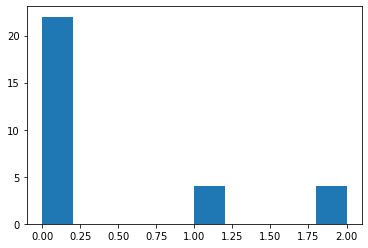

In [15]:
plt.hist(df['cluster'])

In [16]:
#new_df.to_csv('sample_data/hasil_2020.csv', index=False)

C:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cabul', ylabel='curanmor'>

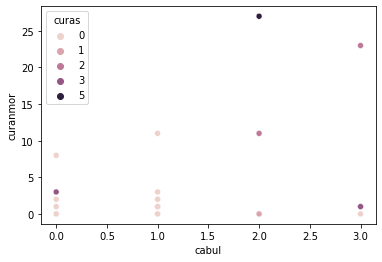

In [17]:
sns.scatterplot(dataset_nokec.iloc[:,0], dataset_nokec.iloc[:,1], dataset_nokec.iloc[:,2], hue=km.labels_)

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_score(dataset_nokec, km.labels_)

0.5443748100864058